# **📊 What Happened to Canada–U.S. Trade After Trump's Tariffs?**

**1. Introduction**

This notebook investigates the impact of U.S. trade policy—particularly the reintroduction of tariffs under Trump—on Canada–U.S. trade relations.
We analyze monthly customs trade data from January 2022 to April 2025 to identify shifts in import/export volumes and the overall trade balance.

**Data source:**

*International merchandise trade for all countries and by Principal Trading Partners, monthly (x 1,000,000)* [link text](https://https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1210001101)



In [21]:
# prompt: uloade a csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 12100011.csv to 12100011.csv


In [5]:
df = pd.read_csv('12100011.csv')

In [6]:
df.info() #check data
df['REF_DATE'] = pd.to_datetime(df['REF_DATE']) #change month data to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88740 entries, 0 to 88739
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   REF_DATE                    88740 non-null  object 
 1   GEO                         88740 non-null  object 
 2   DGUID                       88740 non-null  object 
 3   Trade                       88740 non-null  object 
 4   Basis                       88740 non-null  object 
 5   Seasonal adjustment         88740 non-null  object 
 6   Principal trading partners  88740 non-null  object 
 7   UOM                         88740 non-null  object 
 8   UOM_ID                      88740 non-null  int64  
 9   SCALAR_FACTOR               88740 non-null  object 
 10  SCALAR_ID                   88740 non-null  int64  
 11  VECTOR                      88740 non-null  object 
 12  COORDINATE                  88740 non-null  object 
 13  VALUE                       887

**2. Extracting Canada–U.S. Trade Data (2022–2025)**

We begin by isolating trade data between Canada and the U.S. for both imports and exports.
Note: The data used is unadjusted and based on customs values.


In [7]:

#filter dataframe:
df_us = df[(df['Principal trading partners'] == 'United States') &
           (df['Seasonal adjustment'] == 'Unadjusted') &
           (df['Basis'] == 'Customs')&
           (df['REF_DATE'] >= '2022-01-01')]

#keep the columns we need
df_us = df_us[['REF_DATE','Trade','VALUE']]

#new dataframes for import and export
df_us_import = df_us[df_us['Trade'] == 'Import']
df_us_export = df_us[df_us['Trade'] == 'Export']

#rename the columns
df_us_import = df_us_import.rename(columns={'VALUE':'Import Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)
df_us_export = df_us_export.rename(columns={'VALUE':'Export Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)

#join to one datafram
df_ca_us_trade = pd.merge(df_us_import, df_us_export, on='Month', how = 'inner')

**3. Extracting Total Trade Data (2022–2025)**


We apply the same process to retrieve Canada’s total trade data with all countries, covering both imports and exports.

In [8]:
# to create the Canada total trade dataset since 2022 to 2025
df_total = df[(df['Principal trading partners'] == 'All countries') &
       (df['Seasonal adjustment'] == 'Unadjusted') &
       (df['Basis'] == 'Customs') &
       (df['REF_DATE'] >= '2022-01-01')]

df_total = df_total[['REF_DATE','Trade','VALUE']]

df_total_import = df_total[df_total['Trade'] == 'Import']
df_total_export = df_total[df_total['Trade'] == 'Export']

df_total_import = df_total_import.rename(columns={'VALUE':'Import Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)
df_total_export = df_total_export.rename(columns={'VALUE':'Export Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)

df_ca_total_trade = pd.merge(df_total_import, df_total_export, on='Month', how = 'inner')



**4. Visualizing the Changes**


Let’s explore how Canada–U.S. trade has evolved over the past few years through visual analysis.

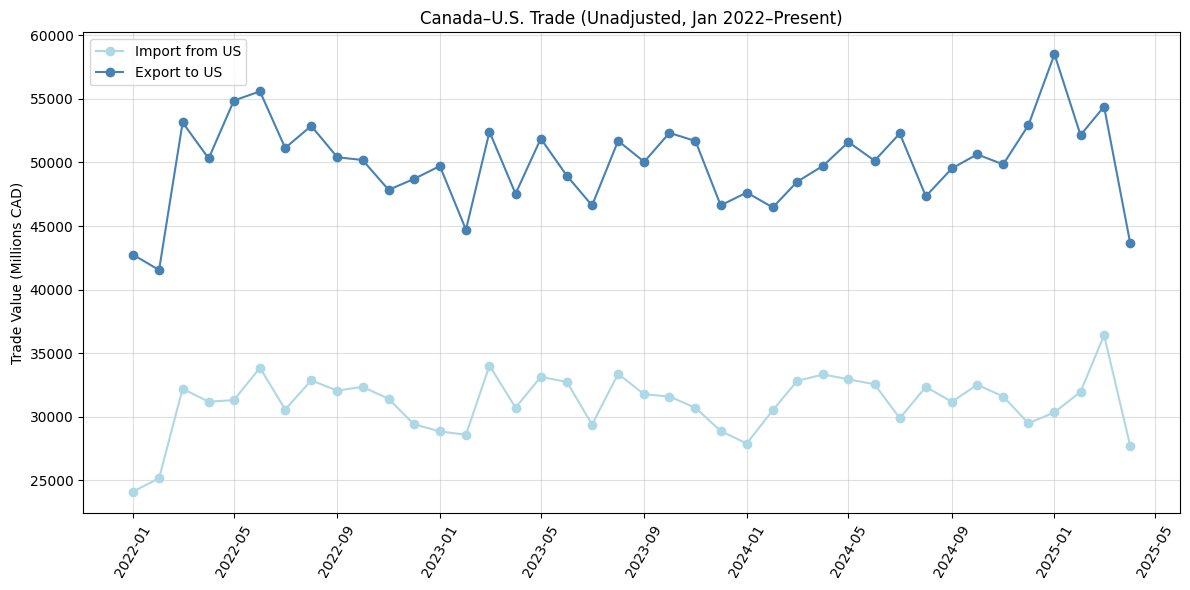

In [11]:
# To create a chart for us
plt.figure(figsize=(12,6))
plt.plot(df_ca_us_trade['Month'], df_ca_us_trade['Import Value'], color = 'lightblue', label = 'Import from US', marker='o')
plt.plot(df_ca_us_trade['Month'], df_ca_us_trade['Export Value'], color = 'steelblue',  label = 'Export to US', marker='o')

plt.legend()
plt.title("Canada–U.S. Trade (Unadjusted, Jan 2022–Present)")
plt.ylabel("Trade Value (Millions CAD)")
plt.xticks(rotation=60)

plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()

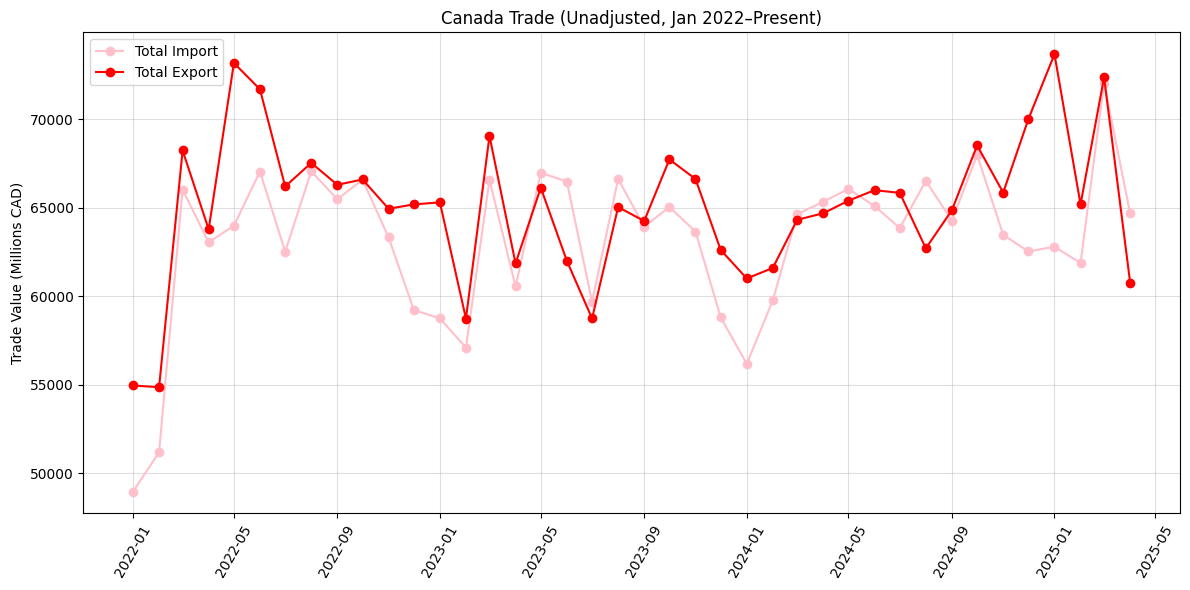

In [12]:
# To create a chart for total trade
plt.figure(figsize=(12,6))
plt.plot(df_ca_total_trade['Month'], df_ca_total_trade['Import Value'], color = 'pink', label = 'Total Import', marker='o')
plt.plot(df_ca_total_trade['Month'], df_ca_total_trade['Export Value'], color = 'red', label = 'Total Export', marker='o')

plt.legend()
plt.title("Canada Trade (Unadjusted, Jan 2022–Present)")
plt.ylabel("Trade Value (Millions CAD)")
plt.xticks(rotation=60)

plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()

**5. Measuring the Impact: U.S. vs. the Rest of the World**


We calculate the percentage change in Canada’s trade with the U.S. and other countries.
To do this, we compare April 2025 values with the average monthly trade from the three years prior to Trump’s return to the White House and renewed tariff threats.

In [13]:
#to Calculate the summary fo the US
us_pre_Trump_ex_avg = np.round(df_ca_us_trade[df_ca_us_trade['Month'] < '2025-01-01']['Export Value'].mean(), 1)
us_ex_apr2025 = df_ca_us_trade[df_ca_us_trade['Month'] == '2025-04']['Export Value'].values[0]
us_ex_drop = np.round(((us_ex_apr2025/us_pre_Trump_ex_avg)-1)*100, 1)

us_pre_Trump_im_avg = np.round(df_ca_us_trade[df_ca_us_trade['Month'] < '2025-01-01']['Import Value'].mean(), 1)
us_im_apr2025 = df_ca_us_trade[df_ca_us_trade['Month'] == '2025-04']['Import Value'].values[0]
us_im_drop = np.round(((us_im_apr2025/us_pre_Trump_im_avg)-1)*100, 1)

#to Calculate the summary fo total
total_pre_Trump_ex_avg = np.round(df_ca_total_trade[df_ca_total_trade['Month'] < '2025-01-01']['Export Value'].mean(), 1)
total_ex_apr2025 = df_ca_total_trade[df_ca_total_trade['Month'] == '2025-04']['Export Value'].values[0]
total_ex_drop = np.round(((total_ex_apr2025/total_pre_Trump_ex_avg)-1)*100, 1)

total_pre_Trump_im_avg = np.round(df_ca_total_trade[df_ca_total_trade['Month'] < '2025-01-01']['Import Value'].mean(), 1)
total_im_apr2025 = df_ca_total_trade[df_ca_total_trade['Month'] == '2025-04']['Import Value'].values[0]
total_im_drop = np.round(((total_im_apr2025/total_pre_Trump_im_avg)-1)*100, 1)

In [14]:
# to create a summery dataframe.
summary = {
    "Average(2022–2024)": [
        us_pre_Trump_ex_avg,
        us_pre_Trump_im_avg,
        total_pre_Trump_ex_avg,
        total_pre_Trump_im_avg
    ],
    "April2025": [
        us_ex_apr2025,
        us_im_apr2025,
        total_ex_apr2025,
        total_im_apr2025
    ],
    "Change(%)": [
        us_ex_drop,
        us_im_drop,
        total_ex_drop,
        total_im_drop
    ]}

index = [
    "Export to US",
    "Import from US",
    "Canada Total Export",
    "Canada Total Import"]

df_summary = pd.DataFrame(summary, index = index)

,Average(2022–2024),April2025,Change(%)
Export to US,49729.2,43682.3,-12.2
Import from US,31031.1,27728.9,-10.6
Canada Total Export,64784.5,60771.3,-6.2
Canada Total Import,62895.0,64673.5,2.8


**6. Conclusion**

This analysis highlights how Canada’s trade landscape has shifted in the past four months, especially in relation to the U.S.
The results provide early indicators of economic adjustment as Canada navigates the new trade environment.



📉 🇺🇲 Canada's exports to the U.S. dropped by -12.2% in April 2025
📉🌐 Meanwhile the total Canada's export dropped by -6.2%
--------------------------------------------------------------------------------
📦 Imports from the U.S. to Canada dropped by -10.6 in April 2025%
📉 🌐 Meanwhile the total Canada's total import vale increased by 2.8%
--------------------------------------------------------------------------------
+---------------------+--------------------+-----------+-----------+
|                     | Average(2022–2024) | April2025 | Change(%) |
+---------------------+--------------------+-----------+-----------+
|    Export to US     |      49729.2       |  43682.3  |   -12.2   |
|   Import from US    |      31031.1       |  27728.9  |   -10.6   |
| Canada Total Export |      64784.5       |  60771.3  |   -6.2    |
| Canada Total Import |      62895.0       |  64673.5  |    2.8    |
+---------------------+--------------------+-----------+-----------+


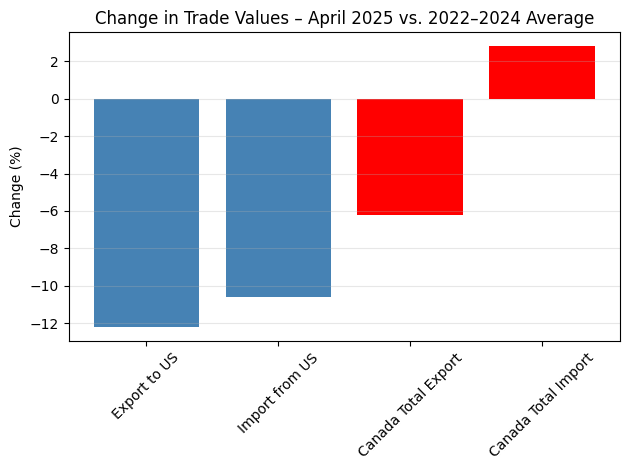

In [20]:
#to print the summary
print(f"📉 🇺🇲 Canada's exports to the U.S. dropped by {us_ex_drop}% in April 2025")
print(f"📉🌐 Meanwhile the total Canada's export dropped by {total_ex_drop}%")
print('--' * 40)
print(f"📦 Imports from the U.S. to Canada dropped by {us_im_drop} in April 2025%")
print(f"📉 🌐 Meanwhile the total Canada's total import vale increased by {total_im_drop}%")
print('--' * 40)
print(tabulate(df_summary, headers='keys', tablefmt='pretty'))


# chart to show changes

custom_colors = ['steelblue' if 'US' in idx else 'red' for idx in df_summary.index]
plt.bar(x=index, height='Change(%)', data = df_summary, color=custom_colors)
plt.title("Change in Trade Values – April 2025 vs. 2022–2024 Average")
plt.ylabel("Change (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

